In [42]:
#!/usr/bin/env python3

import time
import numpy as np
import gym
import gym_miniworld

# Benchmark loading time
st = time.time()
env = gym.make('MiniWorld-FourRooms-v0')
env.seed(0)
env.reset()
load_time = 1000 * (time.time() - st)

# Benchmark the reset time
st = time.time()
for i in range(100):
    env.reset()
reset_time = 1000 * (time.time() - st) / 100

# Benchmark the rendering/update speed
st = time.time()

# Test a single step
action = 0
obs, reward, done, info = env.step(action)




Falling back to non-multisampled frame buffer
Falling back to num_samples=8
Falling back to non-multisampled frame buffer


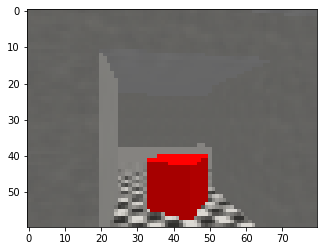

In [47]:
import matplotlib.pyplot as plt

plt.imshow(obs)

In [54]:
import visualpriors
import subprocess
import torch
import torch.utils
import torch.utils.model_zoo

# Load image and rescale/resize to [-1,1] and 3x256x256
o_t = torch.Tensor(obs).permute(2,0,1)
o_t =o_t.unsqueeze(0)/50 - 1

In [59]:
feature = 'keypoints3d'
representation = visualpriors.representation_transform(o_t, feature, device='cpu') # phi(o_t) in the diagram below
pred = visualpriors.feature_readout(o_t, feature, device='cpu')
representation.shape

torch.Size([1, 8, 4, 5])

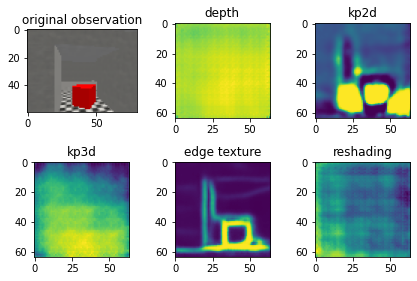

In [60]:

depth = visualpriors.feature_readout(o_t, 'depth_euclidean', device='cpu')
kp2d = visualpriors.feature_readout(o_t, 'keypoints2d', device='cpu')
kp3d = visualpriors.feature_readout(o_t, 'keypoints3d', device='cpu')
etext = visualpriors.feature_readout(o_t, 'edge_texture', device='cpu')
reshade = visualpriors.feature_readout(o_t, 'reshading', device='cpu')


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.imshow(obs)
ax1.set_title("original observation")
ax2.imshow(depth[0,:,:,:].permute((1,2,0)))
ax2.set_title("depth")
ax3.imshow(kp2d[0,:,:,:].permute((1,2,0)))
ax3.set_title("kp2d")
ax4.imshow(kp3d[0,:,:,:].permute((1,2,0)))
ax4.set_title("kp3d")
ax5.imshow(etext[0,:,:,:].permute((1,2,0)))
ax5.set_title("edge texture")
ax6.imshow(reshade[0,:,:,:].permute((1,2,0)))
ax6.set_title("reshading")
fig.tight_layout()
plt.show()

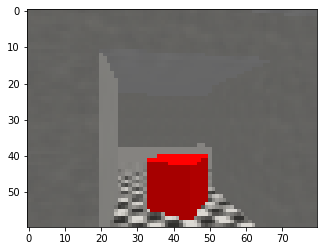

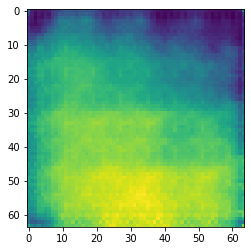

In [61]:
plt.imshow(obs)
plt.show()
plt.imshow(pred[0,:,:,:].permute((1,2,0)))
plt.show()

Falling back to non-multisampled frame buffer
Falling back to num_samples=8
Falling back to non-multisampled frame buffer


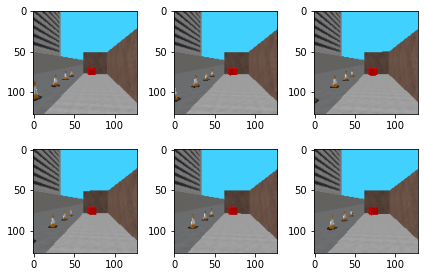

In [73]:
from gym_miniworld.envs.sidewalk import Sidewalk

miniworld = Sidewalk(obs_height=128, obs_width=128)

obs1, _, _, _ = miniworld.step(2)
obs2, _, _, _ = miniworld.step(2)
obs3, _, _, _ = miniworld.step(2)
obs4, _, _, _ = miniworld.step(2)
obs5, _, _, _ = miniworld.step(2)
obs6, _, _, _ = miniworld.step(2)


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.imshow(obs1)
ax2.imshow(obs2)
ax3.imshow(obs3)
ax4.imshow(obs4)
ax5.imshow(obs5)
ax6.imshow(obs6)
fig.tight_layout()

plt.show()